# Parte 1 - Resolvendo um  Problema Linearmente Separável

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Franscisco Arcos Filho - 1215080042

## Importação das bibliotecas

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo dataAll.txt com numpy

In [5]:
dataAll = np.fromfile('../dados/dataAll.txt')
print(dataAll)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


### Vendo o formato inicial do array

In [6]:
dataAll.shape

(3000,)

#### Sendo 3000 valores, significa que há 1000 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [7]:
dataAll = dataAll.reshape(1000, 3)
print(dataAll)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


## Algoritmo de treinamento do Perceptron

#### Assim como na especificação da atividade será utilizada uma função degrau com valor de theta igual a 0 e uma taxa de aprendizado = 0,1 e também um viés.

In [8]:
theta = 0.0
n = 0.1
bias = -1.0

#### O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo. Além disso, será considerado precisão de 4 casas decimais

In [9]:
weights = np.random.uniform(-0.5, 0.5, size=(3, ))
weights = np.round(weights, 4)
weights

array([ 0.0334, -0.2016,  0.1055])

#### processo de aprendizado

In [10]:
epochs = 0
u = 0
adjust_total = 0
erros_in_epoch = 1000

while (erros_in_epoch != 0):
    epochs += 1
    adjust_in_epoch = 0
    erros_in_epoch = 0
    
    for example in dataAll:
        fu = 0.0
        u = weights[0]*bias + weights[1]*example[0] + weights[2]*example[1]
        if u >= theta:
            fu = 1.0
        else:
            fu = 0.0
        u = 0.0
        
        if fu != example[2]:
            adjust_in_epoch += 1
            adjust_total += 1
            erros_in_epoch += 1
            weights = weights + n*(example[2] - fu)*np.array([bias, example[0], example[1]])
            weights = np.round(weights, 4)
            print("Vetor de pesos ajustado, novo vetor de pesos")
            np.set_printoptions(precision=4, suppress=True)
            print(weights)
            print("")
            
    print("Número de ajustes do vetor de pesos na época", epochs, ":", adjust_in_epoch)
    print("")
    
print("Número total de ajustes do vetor de pesos:", adjust_total)


Vetor de pesos ajustado, novo vetor de pesos
[  0.1334  36.1772 -24.3087]

Vetor de pesos ajustado, novo vetor de pesos
[   0.2334  -17.4819 -100.8044]

Vetor de pesos ajustado, novo vetor de pesos
[  0.1334  55.3141 -64.9748]

Vetor de pesos ajustado, novo vetor de pesos
[  0.0334 137.9128  14.881 ]

Vetor de pesos ajustado, novo vetor de pesos
[  0.1334 143.7586 -63.4136]

Vetor de pesos ajustado, novo vetor de pesos
[   0.2334  103.7497 -141.3063]

Vetor de pesos ajustado, novo vetor de pesos
[  0.3334 157.4195 -92.214 ]

Vetor de pesos ajustado, novo vetor de pesos
[   0.2334  104.4594 -149.0835]

Vetor de pesos ajustado, novo vetor de pesos
[  0.3334 164.0189 -98.9612]

Vetor de pesos ajustado, novo vetor de pesos
[   0.2334  118.4943 -164.5971]

Vetor de pesos ajustado, novo vetor de pesos
[  0.3334 209.2102 -89.8838]

Vetor de pesos ajustado, novo vetor de pesos
[   0.2334  151.4292 -150.192 ]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1334  103.1626 -198.6617]

Vetor d

## Resultados

#### O número total de ajustes do vetor de pesos foi de 55
#### O número de épocas até a convergência foi de 4

### Cáculo da reta solução a partir dos pesos encontrados
#### A equação da reta pode ser expressa por: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1, onde:
    x2 e x1, representam os eixos;
    weights[0], último valor de peso atribuído ao viés;
    weights[1], último valor de peso atribuído ao valor das entradas do eixo x1;
    weights[2], último valor de peso atribuído ao valor das entradas do eixo x2;

In [11]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.0014 -(-0.9994)*x1


#### Em particular, a reta solução é muito próxima da reta x2 = x1

### Gráfico do conjunto de dados e a reta solução que separa as classes

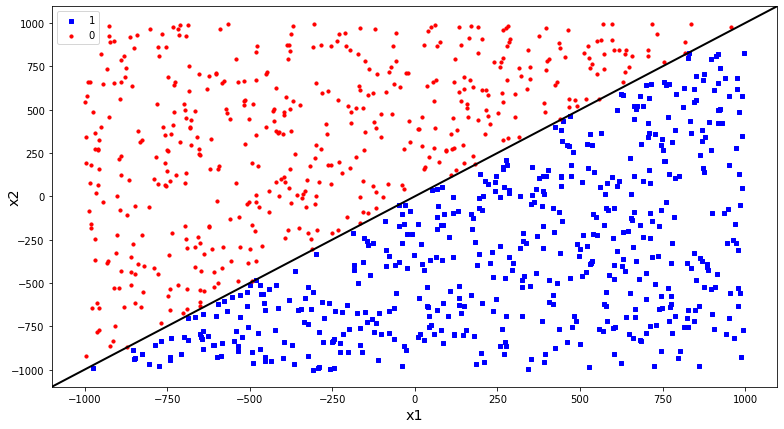

In [30]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in dataAll:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-10, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()